In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

import biff
from pygadgetreader import *
from octopus import profiles
from octopus import orbit_cm
from astropy import constants
from astropy import units as u

from octopus import profiles

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
font = {'size':16, 'family':'serif'}
plt.matplotlib.rc('font', **font)

In [3]:
G_c = constants.G
G_c = G_c.to(u.kiloparsec**3 / (u.s**2 * u.Msun)) # 
print G_c

4.51835939627e-39 kpc3 / (s2 solMass)


# To-do
1. Check 1.4 factor in the potential!
2. Play with more coefficients in $n, l, m$
3. Make 2d plots
4. Compare the value of the potential at a given positions

In [4]:
# Simulated data:

MW = readsnap('../data/MW_models/pm/MWN2vir_001.hdf5', 'pos', 'dm')
MW_mass = readsnap('../data/MW_models/pm/MWN2vir_001.hdf5', 'mass', 'dm')
MW_disk = readsnap('../data/MW_models/pm/MWN2vir_001.hdf5', 'pos', 'disk')
MW_bulge = readsnap('../data/MW_models/pm/MWN2vir_001.hdf5', 'pos', 'bulge')
MWf_bulge = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_130.hdf5', 'pos', 'bulge')
MW_pot = readsnap('../data/MW_models/pm/MWN2vir_001.hdf5', 'pot', 'dm')

MW_sph_pot = readsnap('../data/MW_models/triaxial/spherical_002.hdf5', 'pot', 'dm')
MW_sph_pos = readsnap('../data/MW_models/triaxial/spherical_002.hdf5', 'pos', 'dm')

In [5]:
print len(MW_sph_pos)
print len(MW_sph_pot)

500000
500000


In [6]:
# Truncating the halo at 500kpc
trunc1 = np.where(np.sqrt((MW[:,0])**2.0 + (MW[:,1])**2.0 + (MW[:,2])**2.0)<500)[0]
trunc2 = np.where(np.sqrt((MW[:,0])**2.0 + (MW[:,1])**2.0 + (MW[:,2])**2.0)<30)[0]

trunc3 = np.where(np.sqrt((MW_sph_pos[:,0])**2.0 + (MW_sph_pos[:,1])**2.0 + (MW_sph_pos[:,2])**2.0)<30)[0]

In [7]:
MW_t = MW[trunc1]
MW_mass_t = MW_mass[trunc1]
MW_pot_t = MW_pot[trunc1]


MW2_t = MW[trunc2]
MW2_mass_t = MW_mass[trunc2]
MW2_pot_t = MW_pot[trunc2]


MW2_t = MW[trunc2]
MW2_mass_t = MW_mass[trunc2]
MW2_pot_t = MW_pot[trunc2]

In [8]:
# Function to write the coefficients.
def writting_coeff(name, S, T):
    f = open(name, 'w')
    f.write("# S    T \n")
    S1d = np.reshape(S, (np.size(S),1))
    T1d = np.reshape(T, (np.size(T),1))
    for i in range(len(S1d)):
        f.write("%f %f \n"%(S1d[i][0], T1d[i][0]))
    f.close

In [9]:
## Code taken from (https://github.com/adrn/biff/blob/master/notebooks/Plummer%20test.ipynb)
def STnlm(xyz, mass, rs, n_max, l_max):
    nmax = n_max
    lmax = l_max

    Snlm = np.zeros((nmax+1,lmax+1,lmax+1))
    Tnlm = np.zeros((nmax+1,lmax+1,lmax+1))

    nlms = []

    for n in range(nmax+1):
        for l in range(lmax+1):
            for m in range(l+1):
                nlms.append([n,l,m])

    for nlm in nlms:
        n,l,m = nlm
        S,T = biff.compute_coeffs_discrete(np.double(xyz), np.double(mass/100.0), nlm, rs)
        Snlm[n,l,m] = S
        Tnlm[n,l,m] = T
    return Snlm, Tnlm, nlms

# MW isolated halo (Hernquist)

In [10]:
r_MW_t = np.sqrt(MW_t[:,0]**2.0 + MW_t[:,1]**2.0 + MW_t[:,2]**2.0)
rho_teo_s = profiles.dens_hernquist(40.85, np.sort(r_MW_t), 1.55E12) 
rho_teo = profiles.dens_hernquist(40.85, r_MW_t, 1.55E12) 

In [11]:
## MW isolated halo 1 term in N

SMW1, TMW1, nlmsMW1 = STnlm(MW_t, MW_mass_t, 40.85, 0, 0)
MWbfe_pot = biff.potential(np.ascontiguousarray(np.double(MW_t)), SMW1, TMW1, 1, 0, G_c.value, 1.55E12, 40.85)
MWbfe_rho = biff.density(np.ascontiguousarray(np.double(MW_t)), SMW1, TMW1, 1, 0, 1.55E12, 40.85)


In [12]:
## MW isolated halo 10 term in N

SMW2, TMW2, nlmsMW2 = STnlm(MW_t, MW_mass_t, 40.85, 10, 0)
MWbfe_pot2 = biff.potential(np.ascontiguousarray(np.double(MW_t)), SMW2, TMW2, 10, 0, G_c.value, 1.55E12, 40.85)
MWbfe_rho2 = biff.density(np.ascontiguousarray(np.double(MW_t)), SMW2, TMW2, 10, 0, 1.55E12, 40.85)

In [13]:
## MW isolated halo 20 term in N

SMW3, TMW3, nlmsMW3 = STnlm(MW_t, MW_mass_t, 40.85, 20, 0)
MWbfe_pot3 = biff.potential(np.ascontiguousarray(np.double(MW_t)), SMW3, TMW3, 20, 0, G_c.value, 1.55E12, 40.85)
MWbfe_rho3 = biff.density(np.ascontiguousarray(np.double(MW_t)), SMW3, TMW3, 20, 0, 1.55E12, 40.85)

(1e-06, 2)

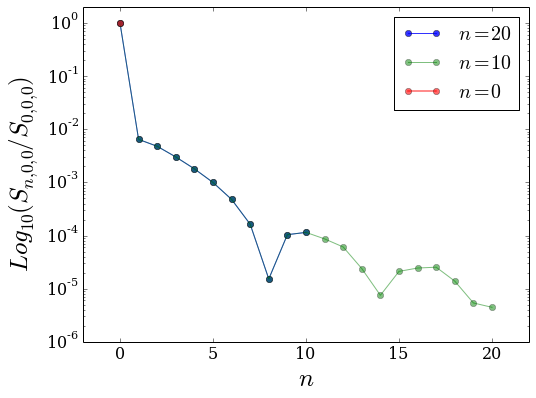

In [68]:
plt.figure(figsize=(8,6))
plt.semilogy(np.array(nlmsMW2)[:,0], np.abs(SMW2.flat/SMW2[0,0,0])[:], marker='o', c='b', alpha=0.8, label='$n=20$')
plt.semilogy(np.array(nlmsMW3)[:,0], np.abs(SMW3.flat/SMW3[0,0,0])[:], marker='o', c='g', alpha=0.5, label='$n=10$')
plt.semilogy(np.array(nlmsMW1)[:,0], np.abs(SMW1.flat/SMW1[0,0,0])[:], marker='o', c='r', lw=1.5, alpha=0.6, label='$n=0$')
plt.xlabel(r'$n$', fontsize=25)
plt.ylabel(r'$Log_{10}(S_{n,0,0}/S_{0,0,0})$', fontsize=25)
plt.legend(loc='best', fontsize=20)
plt.savefig("Snlm_MW", dpi=300, format='pdf', bbox_inches='tight')
plt.savefig("Snlm_MW", dpi=300, format='png', bbox_inches='tight')
plt.savefig("Snlm_MW", dpi=300, format='eps', bbox_inches='tight')

plt.xlim(-2, 22)
plt.ylim(1E-6, 2)
#plt.xlim(0,30)
#plt.ylim(1E-6, 1.0)


In [14]:
def sortingx(x,y):
    sort_arg = np.argsort(x, axis=0)
    return x[sort_arg], y[sort_arg]

In [15]:
factor=1.5

residuals1 = np.zeros((len(r_MW_t), 2))
residuals1[:,0], residuals1[:,1] = sortingx(r_MW_t, (MWbfe_rho - (rho_teo*factor))/rho_teo*factor)


residuals2 = np.zeros((len(r_MW_t), 2))
residuals2[:,0], residuals2[:,1] = sortingx(r_MW_t, (MWbfe_rho2 - (rho_teo*factor))/rho_teo*factor)

residuals3 = np.zeros((len(r_MW_t), 2))
residuals3[:,0], residuals3[:,1] = sortingx(r_MW_t, (MWbfe_rho3 - (rho_teo*factor))/rho_teo*factor)

#residuals4 = np.zeros((len(r_MW_t), 2))
#residuals4[:,0], residuals4[:,1] = sortingx(r_MW_t, (MWbfe_rho4 - (rho_teo*factor))/rho_teo*factor)

dens_mw1 = np.zeros((len(r_MW_t), 2))
dens_mw1[:,0], dens_mw1[:,1] = sortingx(r_MW_t, MWbfe_rho)

dens_mw2 = np.zeros((len(r_MW_t), 2))
dens_mw2[:,0], dens_mw2[:,1] = sortingx(r_MW_t, MWbfe_rho2)

dens_mw3 = np.zeros((len(r_MW_t), 2))
dens_mw3[:,0], dens_mw3[:,1] = sortingx(r_MW_t, MWbfe_rho3)



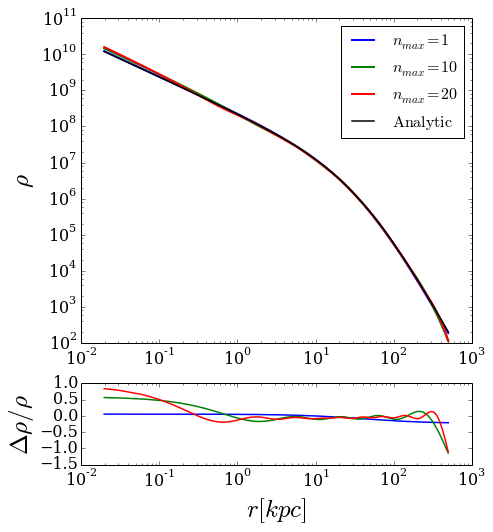

In [43]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[14, 8])
gs = gridspec.GridSpec(2, 1, width_ratios=[1,1], height_ratios=[4,1])

ax1 = plt.subplot(gs[0])
ax1.loglog(dens_mw1[:,0], dens_mw1[:,1], label='$n_{max} = 1$', lw=2, alpha=1)
ax1.loglog(dens_mw2[:,0], dens_mw2[:,1], label='$n_{max} = 10$', lw=2, alpha=1)
ax1.loglog(dens_mw3[:,0], dens_mw3[:,1], label='$n_{max} = 20$', lw=2, alpha=1)
#ax1.loglog(r_MW_t, MWbfe_rho4, label='$n_{max} = 5,\ l_{max}=5$')
ax1.loglog(np.sort(r_MW_t), rho_teo_s*factor, label='$\mathrm{Analytic}$', lw=1.5, c='k')
ax1.legend(fontsize=16, loc='best')
ax1.set_ylabel(r'$\rho$', fontsize=25)

ax2 = plt.subplot(gs[1])
ax2.semilogx(residuals1[:,0], residuals1[:,1], lw=1.5)
ax2.semilogx(residuals2[:,0], residuals2[:,1], lw=1.5)
ax2.semilogx(residuals3[:,0], residuals3[:,1], lw=1.5)
#ax2.semilogx(residuals4[:,0], residuals4[:,1])
ax2.set_xlabel(r'$r[kpc]$', fontsize=25)
ax2.set_ylabel(r'$\Delta \rho / \rho$', fontsize=25)


plt.savefig('rho_MW.png', dpi=300, bbox_inches='tight')

In [23]:
r = np.linspace(0.1, 500, 1000)
hernpot = profiles.pot_hernquist(40.85, r, 1.55E12)
disk_pot = profiles.pot_mn(0.638, 2.9,r, 0, 0, 5.78E10)
bulge_pot = profiles.pot_hernquist(0.7, r, 1.4E10)

bulge_pot_hex = profiles.pot_hernquist(0.7, r_MW_t, 1.4E10)
disk_pot_hex = profiles.pot_mn(0.638, 2.9, r_MW_t, 0, 0, 5.78E10)



In [24]:
# From N-body potential to kpc^2/s^2
pot_factor = G_c/43007.1*1E10 

In [26]:
factor=1.55
pot_mw1 = np.zeros((len(r_MW_t), 2))
pot_mw1[:,0], pot_mw1[:,1] = sortingx(r_MW_t, np.abs(MWbfe_pot/factor))

pot_mw2 = np.zeros((len(r_MW_t), 2))
pot_mw2[:,0], pot_mw2[:,1] = sortingx(r_MW_t, np.abs(MWbfe_pot/factor + bulge_pot_hex + disk_pot_hex))

pot_mw3 = np.zeros((len(r_MW_t), 2))
pot_mw3[:,0], pot_mw3[:,1] = sortingx(r_MW_t, np.abs(MW_pot_t)*pot_factor)

#pot_mw4 = np.zeros((len(r_MW_t), 2))
#pot_mw4[:,0], pot_mw4[:,1] = sortingx(r_MW_t, np.abs(MWbfe_pot2/factor + bulge_pot_hex + disk_pot_hex))


#pot_mw5 = np.zeros((len(r_MW_t), 2))
#pot_mw5[:,0], pot_mw5[:,1] = sortingx(r_MW_t, np.abs(MWbfe_pot4/factor + bulge_pot_hex + disk_pot_hex))

In [50]:
print np.max(MWbfe_pot)

-2.0109868682e-29


In [51]:
MW_pot_dif = np.abs(MW_pot_t)*pot_factor.value - np.abs(MWbfe_pot)/factor

In [52]:
x_MW1_dif, y_MW1_dif, potMW1_dif = pot_contour(MW_t[:,0], MW_t[:,1], MW_pot_dif, 100)



In [53]:
y_MW2_dif, z_MW2_dif, potMW2_dif = pot_contour(MW_t[:,1], MW_t[:,2], MW_pot_dif, 100)

(-40, 40)

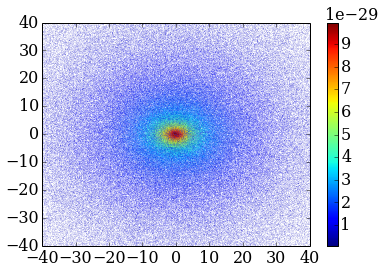

In [59]:
plt.scatter(MW_t[:,1], MW_t[:,2],c= MW_pot_dif, s=0.1, edgecolor='none')
plt.colorbar()
plt.xlim(-40, 40)
plt.ylim(-40, 40)

(-100, 100)

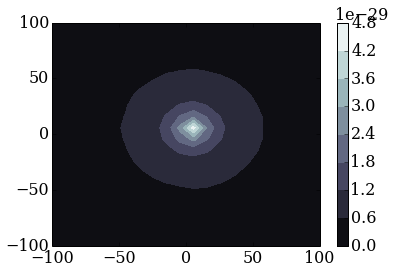

In [54]:
plt.contourf(x_MW1_dif, y_MW1_dif, potMW1_dif, origin='lower', cmap = plt.cm.bone)
plt.colorbar()
plt.xlim(-100, 100)
plt.ylim(-100, 100)


(-100, 100)

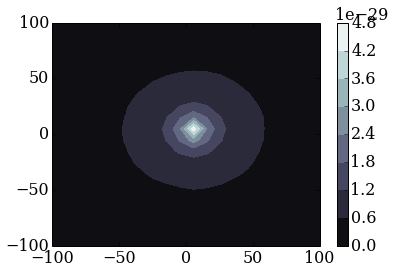

In [55]:
plt.contourf(y_MW2_dif, z_MW2_dif, potMW2_dif, origin='lower', cmap = plt.cm.bone)
plt.colorbar()
plt.xlim(-100, 100)
plt.ylim(-100, 100)

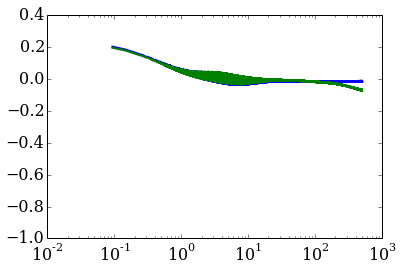

In [27]:
#plt.semilogx(pot_mw1[:,0], (pot_mw1[:,1]-pot_mw3[:,1])/pot_mw3[:,1], label='$n_{max} = 1$', lw=2)
plt.semilogx(pot_mw2[:,0], (pot_mw2[:,1]-pot_mw3[:,1])/pot_mw3[:,1], label='$n_{max} = 1$', lw=2)
plt.semilogx(pot_mw4[:,0], (pot_mw4[:,1]-pot_mw3[:,1])/pot_mw3[:,1], label='$n_{max} = 1$', lw=2)
plt.semilogx(pot_mw5[:,0], (pot_mw5[:,1]-pot_mw3[:,1])/pot_mw3[:,1], label='$n_{max} = 1$', lw=2)

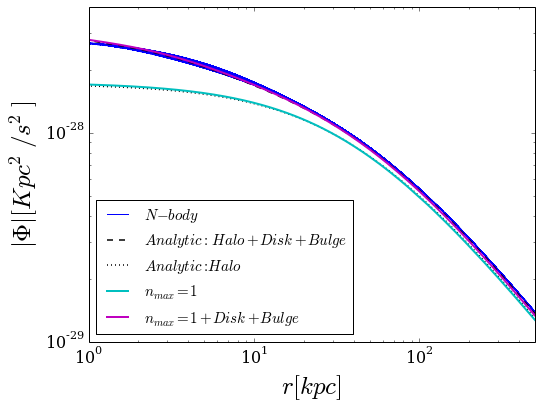

In [70]:
plt.figure(figsize=(8,6))
plt.loglog(pot_mw3[:,0],pot_mw3[:,1], label='$N-body$')
plt.loglog(r, np.abs(hernpot + disk_pot + bulge_pot), label='$Analytic:\ Halo + Disk + Bulge$', lw=1.5, ls='--', c='k')
plt.loglog(r, np.abs(hernpot), label='$Analytic: Halo$', lw=1.5, ls=':', c='k')
plt.loglog(pot_mw1[:,0], pot_mw1[:,1], label='$n_{max} = 1$', lw=2)
plt.loglog(pot_mw2[:,0], pot_mw2[:,1], label='$n_{max} = 1 + Disk + Bulge$', lw=2)
#plt.loglog(r_MW_t, np.abs(MWbfe_pot3), label='$n_{max} = 20$')
#plt.loglog(r_MW_t, np.abs(MWbfe_pot4), label='$n_{max} = 5, l_{max}=5$')
plt.xlim(1, 500)
plt.ylim(1E-29, 4E-28)


plt.legend(fontsize=15, loc='best')
plt.xlabel(r'$r[kpc]$', fontsize=25)
plt.ylabel(r'$|\Phi|[Kpc^2/s^2]$', fontsize=25)

plt.savefig('pot_MW.png', dpi=300, bbox_inches='tight')


## Conclusions from the above plot:

1. N-body potential of DM particles, feel the potential of the disk + buge (blue line)
2. HEX potential doesn't account for disk and bulge. I am going to use the analytic forms of this potentials as a first approx.
3. There is a factor of ~1.45 between the HEX potential and N-body!!!

In [28]:
def potential_residuals(pot_nbody, pot_hex):
    pot_factor = G_c/43007.1*1E10 
    pot_nbody = pot_nbody * pot_factor.value
    # Analytic Disk & Bulge potentials 
    bulge_pot_hex = profiles.pot_hernquist(0.7, r_MW_t, 1.4E10)
    disk_pot_hex = profiles.pot_mn(0.638, 2.9,r_MW_t, 0, 0, 5.78E10)
    pot_hex = pot_hex/1.5 + bulge_pot_hex + disk_pot_hex
    pot_res = (pot_hex - pot_nbody) / pot_nbody
    return pot_res

In [29]:
MW_pot1d = np.reshape(MW_pot_t, (len(MW_pot_t), 1))

In [30]:
def pot_contour(x, y, pot, n_bins):
    x_pot = np.linspace(min(x), max(x), n_bins)
    y_pot = np.linspace(min(y), max(y), n_bins)
    pot_grid = np.zeros((n_bins,  n_bins))

    for i in range(1,n_bins):
        for j in range(1,n_bins):
            index = np.where((x<x_pot[i]) & (x>x_pot[i-1]) & (y<y_pot[j]) & (y>y_pot[j-1]))[0]
            pot_grid[i][j] = np.mean(pot[index])
    return x_pot, y_pot, pot_grid

In [31]:
pot_factor = G_c/43007.1*1E10 
x_MW1, y_MW1, potMW1 = pot_contour(MW_t[:,0], MW_t[:,1], MW_pot_t*pot_factor.value, 100)

/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:71: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


In [34]:
MW_pot_b = MWbfe_pot/factor + bulge_pot_hex + disk_pot_hex
x_MW1_b, y_MW1_b, potMW1_b = pot_contour(MW_t[:,0], MW_t[:,1], MW_pot_b, 100)

KeyboardInterrupt: 

In [33]:
MW_pot_res = (MW_pot_b - MW_pot_t*pot_factor.value)/(MW_pot_t*pot_factor.value)
x_MW1_r, y_MW1_r, potMW1_r = pot_contour(MW_t[:,0], MW_t[:,1], MW_pot_res, 400)

KeyboardInterrupt: 

In [ ]:
MW_pot3_b = MWbfe_pot3/factor + bulge_pot_hex + disk_pot_hex
x_MW3_b, y_MW3_b, potMW3_b = pot_contour(MW_t[:,0], MW_t[:,1], MW_pot3_b, 100)

In [ ]:
MW_pot3_res = (MW_pot3_b - MW_pot_t*pot_factor.value)/(MW_pot_t*pot_factor.value)
x_MW3_r, y_MW3_r, potMW3_r = pot_contour(MW_t[:,0], MW_t[:,1], MW_pot3_res, 100)

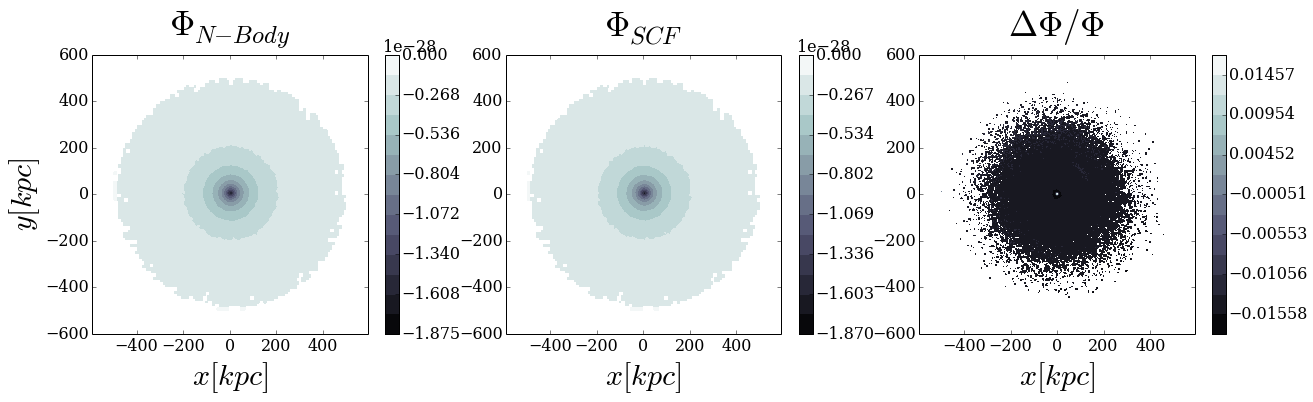

In [98]:
levels1 = np.linspace(np.nanmin(potMW1), np.nanmax(potMW1), 15)
levels2 = np.linspace(np.nanmin(potMW1_b), np.nanmax(potMW1_b), 15)
levels3 = np.linspace(np.nanmin(potMW1_r), np.nanmax(potMW1_r), 15)

plt.figure(figsize=(21, 5))
plt.subplot(1,3,1)
plt.contourf(x_MW1, y_MW1, potMW1, origin='lower', cmap = plt.cm.bone, levels=levels1)
plt.axis('equal')
plt.colorbar()
plt.xlabel('$x[kpc]$', fontsize=30)
plt.ylabel('$y[kpc]$', fontsize=30)
plt.title('$\Phi_{N-Body}$', fontsize=35, y=1.05)

plt.subplot(1,3,2)
plt.contourf(x_MW1_b, y_MW1_b, potMW1_b, origin='lower', cmap = plt.cm.bone, levels=levels2)
plt.axis('equal')
plt.colorbar()
plt.xlabel('$x[kpc]$', fontsize=30)
plt.title('$\Phi_{SCF}$', fontsize=35, y=1.05)


plt.subplot(1,3,3)
plt.contourf(x_MW1_r, y_MW1_r, potMW1_r, origin='lower', cmap = plt.cm.bone, levels=levels3)
plt.axis('equal')
plt.colorbar()
plt.xlabel('$x[kpc]$', fontsize=30)
plt.title('$\Delta \Phi / \Phi$', fontsize=35, y=1.05)

plt.savefig('MW_potn1.png', dpi=300, bbox_inches='tight')

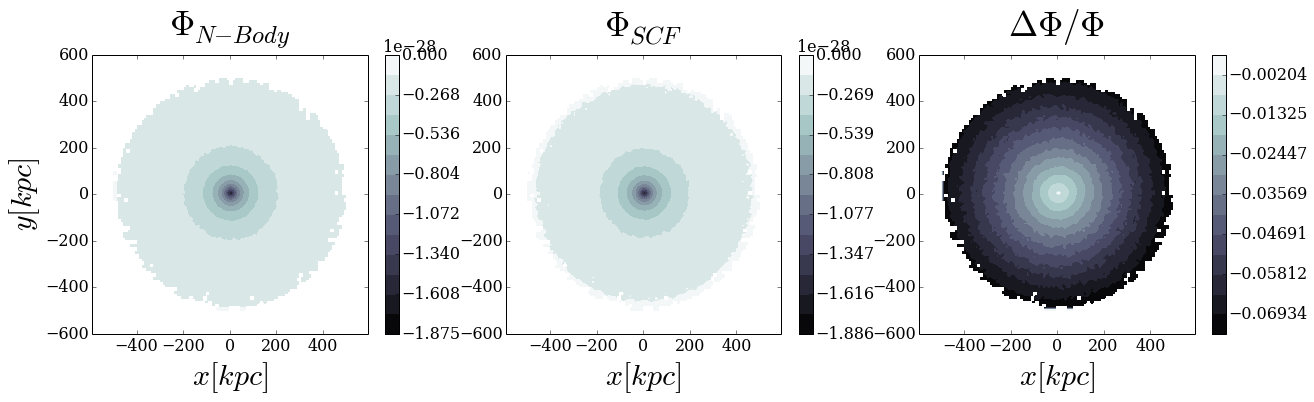

In [91]:
levels4 = np.linspace(np.nanmin(potMW1), np.nanmax(potMW1), 15)
levels5 = np.linspace(np.nanmin(potMW3_b), np.nanmax(potMW3_b), 15)
levels6 = np.linspace(np.nanmin(potMW3_r), np.nanmax(potMW3_r), 15)

plt.figure(figsize=(21, 5))
plt.subplot(1,3,1)
plt.contourf(x_MW1, y_MW1, potMW1, origin='lower', cmap = plt.cm.bone, levels=levels4)
plt.axis('equal')
plt.colorbar()
plt.xlabel('$x[kpc]$', fontsize=30)
plt.ylabel('$y[kpc]$', fontsize=30)
plt.title('$\Phi_{N-Body}$', fontsize=35, y=1.05)

plt.subplot(1,3,2)
plt.contourf(x_MW3_b, y_MW3_b, potMW3_b, origin='lower', cmap = plt.cm.bone, levels=levels5)
plt.axis('equal')
plt.colorbar()
plt.xlabel('$x[kpc]$', fontsize=30)
plt.title('$\Phi_{SCF}$', fontsize=35, y=1.05)


plt.subplot(1,3,3)
plt.contourf(x_MW3_r, y_MW3_r, potMW3_r, origin='lower', cmap = plt.cm.bone, levels=levels6)
plt.axis('equal')
plt.colorbar()
plt.xlabel('$x[kpc]$', fontsize=30)
plt.title('$\Delta \Phi / \Phi$', fontsize=35, y=1.05)

#plt.savefig('MW_potn20.png', dpi=300, bbox_inches='tight')

In [141]:
index_slide = np.where((MW2_t[:,0]<10) & (MW2_t[:,0]>-10))[0]

print len(index_slide)

114061


In [142]:
pot_factor = G_c/43007.1*1E10 

x_MW2, y_MW2, potMW2 = pot_contour(MW2_t[index_slide,0], MW2_t[index_slide,1], MW2_pot_t[index_slide]*pot_factor.value, 100)

In [143]:
y2_MW2, z2_MW2, potMW2 = pot_contour(MW2_t[index_slide,1], MW2_t[index_slide,2], MW2_pot_t[index_slide]*pot_factor.value, 100)

(-10.0, 10.0, -30.0, 30.0)

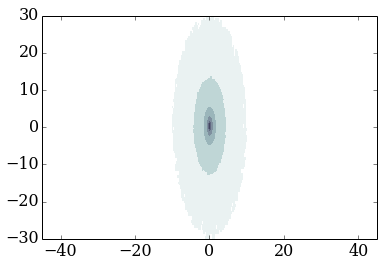

In [144]:
plt.contourf(x_MW2, y_MW2, potMW1, origin='lower', cmap = plt.cm.bone)
plt.axis('equal')


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


<matplotlib.colorbar.Colorbar instance at 0x7f90ecfd8b00>

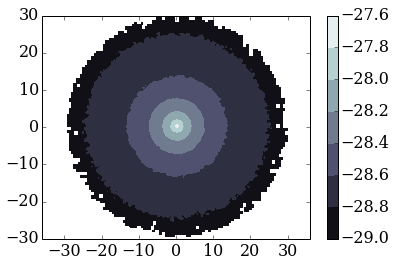

In [145]:
plt.contourf(y2_MW2, z2_MW2, np.log10(np.abs(potMW1)), origin='lower', cmap = plt.cm.bone)
plt.axis('equal')
plt.colorbar()

(-40.0, 40.0, -40.0, 40.0)

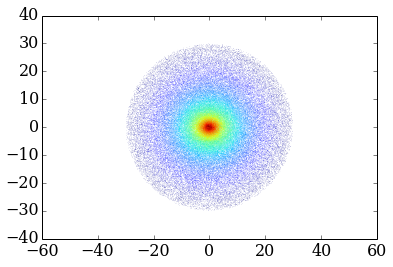

In [161]:
plt.scatter(MW2_t[index_slide,1], MW2_t[index_slide,2], c=(np.abs(MW2_pot_t[index_slide]))
            , edgecolors='', s=0.1)
plt.axis('equal')

(-40, 40)

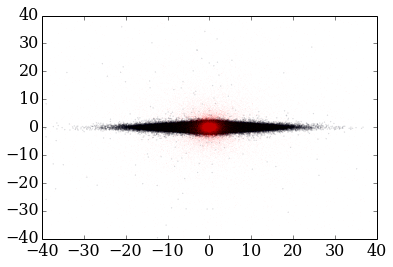

In [168]:
plt.scatter(MW_disk[:,1], MW_disk[:,2], s=0.1, alpha=0.2)
plt.scatter(MW_bulge[:,1], MW_bulge[:,2], s=0.1, alpha=0.2, edgecolor='none', c='r')
plt.xlim(-40, 40)
plt.ylim(-40, 40)


## Coefficients Analysis

In [20]:
from scipy import linalg

In [16]:
def S_matrix(a):
    S = np.zeros((len(a), len(a)))
    for i in range(len(a)):
        for j in range(len(a)):
            S[i][j] = a[i]*a[j]
    return S

In [17]:
S_test = S_matrix(SMW3)

In [23]:
lambdas, eigenv = linalg.eig(S_test)

In [27]:
print len(lambdas)
print np.shape(eigenv)

21
(21, 21)


In [36]:
print(SMW3[2])

[[-0.00869624]]


In [38]:
linalg.eig?

In [42]:
linalg.det(eigenv)

(1.7890820667350077e-19+0.001842803809426528j)